In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import datasets
from skimage import data

In [ ]:
# overall KMeans dataset
X = datasets.load_iris()

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
bgmm = BayesianGaussianMixture(n_components=3)
labels = bgmm.fit_predict(X.data)

In [ ]:
print('ELBO:', bgmm.lower_bound_)

ELBO: 272.72064969997666


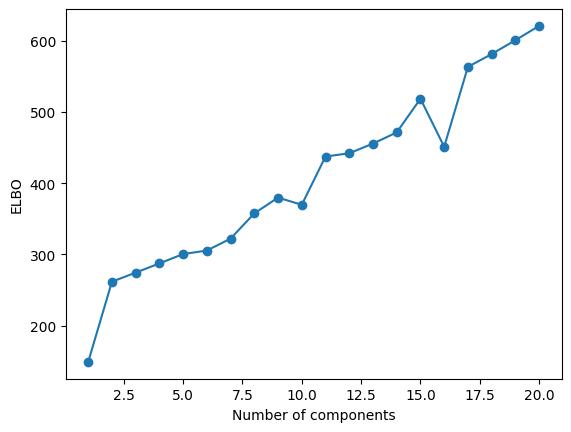

In [ ]:
scores = []
n_components = np.arange(1, 21)
for n in n_components:
    bgmm = BayesianGaussianMixture(n_components=n)
    bgmm.fit(X.data)
    scores.append(bgmm.lower_bound_)

plt.plot(n_components, scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('ELBO')
plt.show()

✅ Recommended Choice: Around 12 Components
Why 12?

*   It gives a high ELBO.
*   It's at the elbow of the curve — the rate of improvement slows beyond this.
*   Going beyond 12 adds complexity without consistent gain.
*   It's before the ELBO fluctuations begin (e.g. the dip at 16).